_Lizenz: Das folgende Lehrmaterial kann unter einer [CC-BY-SA 4.0](https://creativecommons.org/licenses/by/4.0/legalcode) Lizenz frei verwendet, verbreitet und modifiziert werden._   
 _Authoren: Jana Lasser (jana.lasser@ds.mpg.de)_  
 _Das Lehrmaterial wurde im Zuge des Projektes "Daten Lesen Lernen", gefördert vom Stifterverband und der Heinz Nixdorf Stiftung erstellt._

# Übung 08 - Wirtschaftswissenschaften: Bruttoinlandsprodukt und Inferenz
### Praktische Hinweise
$\rightarrow$ Übungen sind dafür gedacht, dass ihr sie euch daheim anseht und versucht, ein paar Aufgaben selbst zu lösen. In den Tutorien könnt ihr euch weiter mit dem Lösungen der Aufgaben beschäftigen und dabei Hilfe von den Tutor*innen bekommen.  

$\rightarrow$ Wenn ein Fehler auftritt:
1. Fehlermeldung _lesen_ und _verstehen_
2. Versuchen, selbst eine Lösung zu finden ($\rightarrow$ hier findet das Lernen statt!)
3. Das Problem googlen (Stichwort: Stackoverflow) oder den/die Nachbar*in fragen
4. Tutor*in fragen

$\rightarrow$ Unter <font color='green'>**HINWEIS**</font> werden Hinweise gegeben, die für die Lösung der Aufgabe hilfreich sind und oftmals auch weiterführende Informationen zur Aufgabe liefern.

$\rightarrow$ Mit **(Optional)** gekennzeichnete Übungsteile sind für besonders schnelle Menschen :-).

<a name="top"></a>Inhalt
--- 

In den vergangenen Tutorien haben wir uns viel mit Streiks und Streiktagen beschäftigt. Im letzten Tutorium möchten wir quantifizieren, ob und wie sich Streiktage auf die Wirtschaft bzw. die Wirtschaft auf die Anzahl der Streiktage auswirken. Dazu ziehen wir zusätzliche Daten zum Bruttoinlandsprodukt der Länder sowie zu deren Bevölkerung heran. In einem ersten Schritt aggregieren wir die Daten aus den verschiedenen Quellen. Um die Werte für die Streiktage vergleichbar zu machen, müssen wir sie mit der Bevölkerungszahl in den Ländern verrechnen (normalisieren). Schlussendlich können wir untersuchen, ob es einen statistisch signifikanten Zusammenhang zwischen Bruttoinlandsprodukt und Streiktagen gibt. Das Tutorium gliedert sich in drei Teile:
* [Datenquellen aggregieren](#datenquellen)
* [Pro-Kopf Streiktage](#pro_kopf_streiktage)
* [Sinkt das BIP durch Streiks?](#inferenz)

<a name="datenquellen"></a>1. Datenquellen aggregieren
---
Im ersten Schritt laden wir alle benötigten Daten in das Notebook. Wir benutzten für die folgende Analyse das "broad" Format der Tabellen, da dieses für unsere Zwecke einfacher zu handhaben ist. Die Tabelle mit den Streiktagen haben wir schon gespeichert und können sie einfach laden:

In [1]:
# importieren der benötigten Module
from os.path import join
import pandas as pd

# laden der Streiktage-Daten 
fname_tage = 'NumberofDaysLostinLabourDisputes_Broad.xlsx'
tage = pd.read_excel(join("daten/", fname_tage))
tage.head(3)

,ccode,country name,1500,1501,1502,1503,1504,1505,1506,1507,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,4.0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8.0,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12.0,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Die Tabelle mit dem Zeitverlauf des Bruttolinlandsproduktes musst du erst [hier](https://clio-infra.eu/data/GDPperCapita_Broad.xlsx) herunterladen, in den JupyterHub hochladen und dann mit pandas als DataFrame laden:

In [2]:
ls daten/

Data_Extract_From_World_Development_Indicators.xlsx
GDPperCapita_Broad.xlsx
NumberofDaysLostinLabourDisputes_Broad.xlsx
NumberofLabourDisputes_Broad.xlsx
NumberofWorkersInvolvedinLabourDisputes_Broad.xlsx
global_strikes.csv
global_strikes.xlsx


In [3]:
# laden der GDP-Daten
fname_GDP = 'GDPperCapita_Broad.xlsx'
GDP = pd.read_excel(join("daten/", fname_GDP))
GDP.head(3)

,ccode,country name,1500,1501,1502,1503,1504,1505,1506,1507,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,4.0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,790.0000,863.0000,869.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8.0,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4367.4382,4647.3138,5010.0318,5178.8669,5374.9908,NaN,NaN,NaN,NaN,NaN
2,12.0,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3385.7719,3427.7116,3447.4191,3466.5426,3512.5807,NaN,NaN,NaN,NaN,NaN


Die Tabelle ```Data_Extract_From_World_Development_Indicators.xlsx'``` mit den Daten zur Landesbevölkerung kannst du aus dem StudIP herunterladen. Die Daten stammen aus [dieser](https://databank.worldbank.org/data/reports.aspx?source=2&series=SP.POP.TOTL&country=) Quelle.

In [4]:
# laden der Populationsdaten 
fname_pop = 'Data_Extract_From_World_Development_Indicators.xlsx'
pop = pd.read_excel(join("daten/", fname_pop))
pop.head(3)

,Unnamed: 0,country name,1960_pop,1961_pop,1962_pop,1963_pop,1964_pop,1965_pop,1966_pop,1967_pop,...,2006_pop,2007_pop,2008_pop,2009_pop,2010_pop,2011_pop,2012_pop,2013_pop,2014_pop,2015_pop
0,0,Afghanistan,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,10152331.0,10372630.0,...,25893450.0,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0
1,1,Albania,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,...,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0
2,2,Algeria,11124888.0,11404859.0,11690153.0,11985136.0,12295970.0,12626952.0,12980267.0,13354197.0,...,33777915.0,34300076.0,34860715.0,35465760.0,36117637.0,36819558.0,37565847.0,38338562.0,39113313.0,39871528.0


Unser Ziel ist es, die drei Tabellen zu einer einzigen Tabelle zusammenzuführen. Da die Populationsdaten nur ab 1960 vorliegen, können wir die Einträge vor 1960 in den anderen beiden Datensätzen getrost entfernen:

In [5]:
obsolete_spalten= ['{}'.format(i) for i in range(1500, 1960)]
GDP.drop(columns = obsolete_spalten, inplace=True)
tage.drop(columns = obsolete_spalten, inplace=True)

**A.** Entferne auch die Spalten ```ccode``` aus den beiden DataFrames. Entferne mit der Funktion ```drop_duplicates()``` alle Duplikate ([Dokumentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html)) aus allen drei DataFrames.

Nun wollen wir noch die Spalten so umbenennen, dass selbst nachdem wir die DataFrames zusammengeführt haben klar ist, was die Zahlen bedeuten. Dafür hängen wir an die Jahreszahlen der Streiktage-Tabelle den Suffix ```_days``` an.

In [6]:
tage.rename(columns={'{}'.format(i):'{}_days'.format(i) for i in range(1960, 2016)}, inplace=True)
tage.head(3)

,ccode,country name,1960_days,1961_days,1962_days,1963_days,1964_days,1965_days,1966_days,1967_days,...,2006_days,2007_days,2008_days,2009_days,2010_days,2011_days,2012_days,2013_days,2014_days,2015_days
0,4.0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8.0,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12.0,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**B.** Benenne auch die Spalten im ```GDP```-DataFrame entsprechend um, indem du den suffix ```_GDP``` an die Spaltennamen hängst.

Zwei DataFrames lassen sich mit Hilfe der Funktion ```DataFrame.merge()``` zusammenführen (siehe [Dokumentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html)). Dabei bezeichnet das Argument ```on``` die Spalte, anhand derer die DataFrames zusammengeführt werden. Bei uns wird das die Spalte ```country name``` sein, da diese als einzige in allen drei DataFrames gleich ist. Das Argument ```how``` gibt an, wie die DataFrames zusammengeführt werden. Währen wir ```how=inner``` dann wird die Schnittmenge der Einträge in der Spalte, anhand derer wir die DataFrames zusammenführen, genommen. Das heißt, Zeilen, die nur in einem DataFrame vorhanden sind aber nicht in dem zweiten, fallen weg.

In [7]:
# zusammenfügen der DataFrames mit den Daten zu den Streiktagen und der Bevölkerung
data = tage.merge(pop, on = 'country name', how = 'inner')
# wir sehen, dass 24 Länder weggefallen sind, da sie nur im "tage", nicht
# aber im "pop"-DataFrame vorhanden waren
print('Anzahl Zeilen (Länder): {}'.format(len(data)))
data.head(3)

Anzahl Zeilen (Länder): 174


,ccode,country name,1960_days,1961_days,1962_days,1963_days,1964_days,1965_days,1966_days,1967_days,...,2006_pop,2007_pop,2008_pop,2009_pop,2010_pop,2011_pop,2012_pop,2013_pop,2014_pop,2015_pop
0,4.0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25893450.0,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0
1,8.0,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0
2,12.0,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,33777915.0,34300076.0,34860715.0,35465760.0,36117637.0,36819558.0,37565847.0,38338562.0,39113313.0,39871528.0


**C.** Füge das neu geschaffene DataFrame ```data``` mit dem verbleibenden DataFrame ```GDP``` zusammen.

[Anfang](#top)

<a name="pro_kopf_streiktage"></a>2. Pro-Kopf Streiktage
---
Aktuell liegt die Anzahl der Streiktage für ein Jahr in einem Land als absoluter Wert vor. Natürlich haben größere Ländern tendentiell mehr Streiktage als kleinere.

**A. (optional)** Überprüfe diese Aussage, indem du analysierst, ob die mittlere Anzahl der Streiktage zwischen 1980 und 2000 tatsälich mit der mittleren Bevölkerungsanzahl in diesen Jahren korreliert. Stelle deine Ergebnisse graphisch dar. <font color='green'>**HINWEIS**</font> Benutze dafür die in Teil **3** vorgestellte lineare Regression. Am besten bearbeitest du diese Aufgabe erst, nachdem du Abschnitt **3** bearbeitet hast. </font>

**B.** Teile für jedes Jahr die Anzahl der Streiktage durch die Bevölkerungszahl und füge die resultierende genormte Anzahl an Streiktagen dem DataFrame als neue Spalten hinzu.

Wie gewohnt, können wir das DataFrame nach einzelnen Ländern filtern. Die der Verlauf der absoluten Anzahl der Streiktage lässt sich dann einfach als Zeitreihe visualisieren:

In [8]:
country = 'United Kingdom'
filter_country = data['country name'] == country
data_country = data[filter_country]
data_country.head()

,ccode,country name,1960_days,1961_days,1962_days,1963_days,1964_days,1965_days,1966_days,1967_days,...,2006_pop,2007_pop,2008_pop,2009_pop,2010_pop,2011_pop,2012_pop,2013_pop,2014_pop,2015_pop
166,826.0,United Kingdom,3024000.0,3046000.0,5798000.0,1755000.0,2277000.0,2925000.0,2398000.0,2787000.0,...,60846820.0,61322463.0,61806995.0,62276270.0,62766365.0,63258918.0,63700300.0,64128226.0,64613160.0,65128861.0


Text(0.5, 1.0, 'United Kingdom')

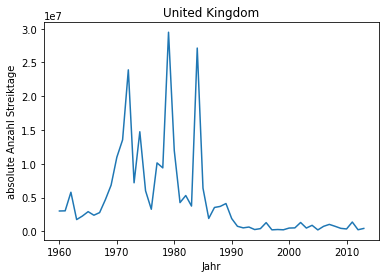

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

years = list(range(1960, 2015))
y = data_country[['{}_days'.format(i) for i in years]].values[0]
plt.plot(years, y)
plt.xlabel('Jahr')
plt.ylabel('absolute Anzahl Streiktage')
plt.title('{}'.format(country))

**C.** Nachdem wir die Streiktage normalisiert haben, sind auch Länder mit drastisch unterschiedlicher Bevölkerungszahl verlgeichbar. Stelle für drei Länder deiner Wahl, deren Bevölkerungszahl sich stark unterscheidet, den Zeitverlauf der mit der Bevölkerungszahl normalisierten Streiktage dar. 

**D. (optional)** Aktuell normalisieren wir die Anzahl der Streiktage in einem Jahr mit der Bevölkerungszahl im selben Jahr. Untersuche anhand des Beispiels von einem Land, wie groß der Unterschied zwischen dieser Vorgehensweise und einer Normalisierung aller Jahre mit der Bevölkerungszahl im Jahr 1960 bzw. 2015 is.

**E.** Stelle für die selben drei Länder wie in Aufgabe **2.C** den Verlauf der Bevölkerungszahl über die Zeit dar. <font color='green'>**HINWEIS:**  mit ```plt.yscale('log')``` stellst du die y-Achse auf logarithmische Darstellung um.</font> 

<a name="inferenz"></a>3. (optional) Sinkt das BIP durch Streiks?
---
Schlussendlich wollen wir uns ansehen, ob wir einen statistisch signifikanten Zusammenhang zwischen BIP und (normalisierter) Anzahl der Streiktage in einem Land feststellen können. Um solche Zusammenhänge zwischen Beobachtungen darzustellen, eignet sich der Scatterplot. Die Funktion ```plt.scatter(x,y)``` ([Dokumentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html)) erlaubt es uns, einen einfachen Scatterplot zu erstellen:

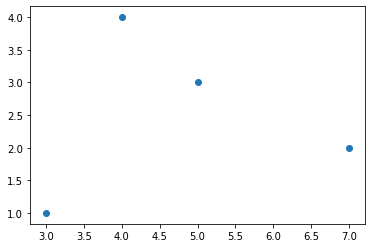

In [10]:
x = [3,5,7,4]
y = [1,3,2,4]

plt.scatter(x,y)

**A. (optional)** Berechne die mittlere Anzahl an Streiktagen pro Person zwischen 1980 und 1990. Speichere berechneten genormten Streiktage zusammen mit dem BIP und dem Ländernamen in einem neuen DataFrame. Entferne mit der Funktion ```df.dropna()``` alle fehlenden Einträge aus dem DataFrame.

**B. (optional)** Stelle das BIP im Jahr 1990 über der mittleren Anzahl an Streiktagen in diesem Zeitraum dar. Benutze dafür das neu erstellte DataFrame.

**C. (optional)** Mache dich mit der Funktion ```linregress()``` der Bibliothek SciPy vertraut ([Dokumentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html)). Was für Eingabewerte verlangt die Funktion? Was für Werte gibt sie aus?

**D. (optional)** führe eine lineare Regression des BIP über den mittleren Streiktagen pro person im vorangegangenen Jahrzehnt durch. Gib die resultierenden Werte aus. Was bedeuten sie? 

**E. (optional)** Stelle die aus der statistischen Regression resultierende Linie über dem Scatterplot aus Aufgabe **2.B** dar.

[Anfang](#top)